In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path = "../cleaned_data/state_level_hospitalization.csv"
df=pd.read_csv(file_path)
col_drop = ["State","Time Period Date Start","Time Period Date End","State FIPS Code"]

df=df.drop(col_drop,axis=1)
df

,Time Period,Category,Demographic Sort Key,Demographic,"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents",Type of Rate
0,CY 2016,Heroin,Statewide,Statewide,14.7,Rate of hospitalizations for heroin overdose p...
1,CY 2016,Heroin,Age Group,Age 15 to 34,26.6,Rate of hospitalizations for heroin overdose p...
2,CY 2016,Heroin,Age Group,Age 35 to 54,15.9,Rate of hospitalizations for heroin overdose p...
3,CY 2016,Heroin,Age Group,Age 55 and over,3.9,Rate of hospitalizations for heroin overdose p...
4,CY 2016,Heroin,Race/Ethnicity,Black (non-Hispanic),12.4,Rate of hospitalizations for heroin overdose p...
5,CY 2016,Heroin,Race/Ethnicity,Hispanic,13.0,Rate of hospitalizations for heroin overdose p...
6,CY 2016,Heroin,Race/Ethnicity,White (non-Hispanic),15.0,Rate of hospitalizations for heroin overdose p...
7,CY 2016,Heroin,Household Income,"$0 to <$30,000 Household Income",28.8,Rate of hospitalizations for heroin overdose p...
8,CY 2016,Heroin,Household Income,"$30,000 to <$60,000 Household Income",15.5,Rate of hospitalizations for heroin overdose p...
9,CY 2016,Heroin,Household Income,"$60,000 to <$90,000 Household Income",12.0,Rate of hospitalizations for heroin overdose p...


## clean age group data

In [6]:
# clean data for age 
age = df[df["Demographic Sort Key"]=="Age Group"]
age_16 = age[age["Time Period"]=="CY 2016"]
age_17 = age[age["Time Period"]=="CY 2017"]

In [7]:
# array(['Rate of hospitalizations for heroin overdose per 100000 population',
#        'Rate of hospitalizations for pain medication overdose per 100000 population'],
#       dtype=object)

merge1=age_16[age_16["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=age_16[age_16["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


age_merged_16 = pd.merge(merge1,merge2,on="Demographic")


age_merged_16 = age_merged_16.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2016 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

age_merged_16 = age_merged_16.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2016 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })

age_merged_16

,Time Period_x,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2016,Age 15 to 34,26.6,CY 2016,10.2
1,CY 2016,Age 35 to 54,15.9,CY 2016,18.5
2,CY 2016,Age 55 and over,3.9,CY 2016,21.1


In [8]:
merge1=age_17[age_17["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=age_17[age_17["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})

age_merged_17 = pd.merge(merge1,merge2,on="Demographic")

age_merged_17 = age_merged_17.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2017 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

age_merged_17 = age_merged_17.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2017 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })

age_merged_17

,Time Period_x,Demographic,2017 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2017,Age 15 to 34,28.8,CY 2017,11.0
1,CY 2017,Age 35 to 54,18.1,CY 2017,17.9
2,CY 2017,Age 55 and over,5.3,CY 2017,19.8


In [9]:
age_final = pd.merge(age_merged_16,age_merged_17,on="Demographic")

del age_final["Time Period_x_x"]
del age_final["Time Period_y_x"]
del age_final["Time Period_x_y"]
del age_final["Time Period_y_y"]

age_final

# Conclusion:
# 1) young ppl OD herioin, old ppl OD pain meds
# 2) herion has increased, while pain meds was stable from 2016 to 2017

,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,2016 Rate of hospitalizations for pain medication overdose per 100000 population,2017 Rate of hospitalizations for heroin overdose per 100000 population,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,Age 15 to 34,26.6,10.2,28.8,11.0
1,Age 35 to 54,15.9,18.5,18.1,17.9
2,Age 55 and over,3.9,21.1,5.3,19.8


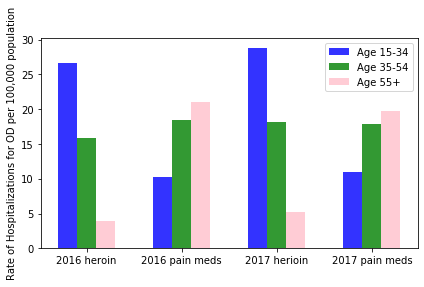

In [86]:
# bar chart for age
n_groups = 4
young = age_final.iloc[0,1:5]
mid = age_final.iloc[1,1:5]
old = age_final.iloc[2,1:5]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, young,bar_width,alpha=opacity,color='b',label='Age 15-34')
rects2 = plt.bar(index + bar_width, mid, bar_width,alpha=opacity,color='g',label='Age 35-54')
rects3 = plt.bar(index + bar_width*2, old, bar_width,alpha=opacity,color='pink',label='Age 55+')

plt.ylabel('Rate of Hospitalizations for OD per 100,000 population')
plt.xticks(index + bar_width, ('2016 heroin', '2016 pain meds', '2017 herioin', '2017 pain meds'))
plt.legend()
plt.tight_layout()
plt.savefig("../Images/age_group.png")
plt.show()

## clean up race data

In [11]:
race = df[df["Demographic Sort Key"]=="Race/Ethnicity"]
race_16 = race[race["Time Period"]=="CY 2016"]
race_17 = race[race["Time Period"]=="CY 2017"]

In [12]:
merge1=race_16[race_16["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=race_16[race_16["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


race_merged_16 = pd.merge(merge1,merge2,on="Demographic")


race_merged_16 = race_merged_16.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2016 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

race_merged_16 = race_merged_16.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2016 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
race_merged_16

,Time Period_x,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2016,Black (non-Hispanic),12.4,CY 2016,19.6
1,CY 2016,Hispanic,13.0,CY 2016,7.2
2,CY 2016,White (non-Hispanic),15.0,CY 2016,17.7


In [13]:
merge1=race_17[race_17["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=race_17[race_17["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


race_merged_17 = pd.merge(merge1,merge2,on="Demographic")


race_merged_17 = race_merged_17.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2017 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

race_merged_17 = race_merged_17.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2017 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
race_merged_17

,Time Period_x,Demographic,2017 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2017,Black (non-Hispanic),16.7,CY 2017,18.5
1,CY 2017,Hispanic,19.3,CY 2017,9.4
2,CY 2017,White (non-Hispanic),16.3,CY 2017,17.0


In [14]:
race_final = pd.merge(race_merged_16,race_merged_17,on="Demographic")

del race_final["Time Period_x_x"]
del race_final["Time Period_y_x"]
del race_final["Time Period_x_y"]
del race_final["Time Period_y_y"]

race_final

# Conclusion:
# 1) hispatic ppl have pain meds lower OD 
# 2) herion surged amongst hispatic in 2017

,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,2016 Rate of hospitalizations for pain medication overdose per 100000 population,2017 Rate of hospitalizations for heroin overdose per 100000 population,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,Black (non-Hispanic),12.4,19.6,16.7,18.5
1,Hispanic,13.0,7.2,19.3,9.4
2,White (non-Hispanic),15.0,17.7,16.3,17.0


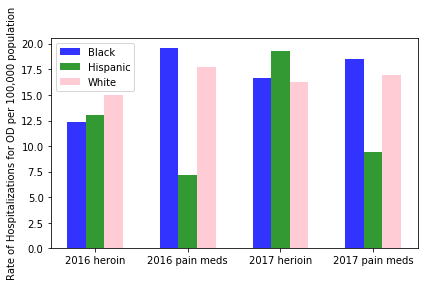

In [84]:
# bar chart for race
n_groups = 4
black = race_final.iloc[0,1:5]
latino = race_final.iloc[1,1:5]
white = race_final.iloc[2,1:5]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index,black,bar_width,alpha=opacity,color='b',label='Black')
rects2 = plt.bar(index+bar_width,latino,bar_width,alpha=opacity,color='g',label='Hispanic')
rects3 = plt.bar(index + bar_width*2,white,bar_width,alpha=opacity,color='pink',label="White")

plt.ylabel('Rate of Hospitalizations for OD per 100,000 population')
plt.xticks(index + bar_width, ('2016 heroin', '2016 pain meds', '2017 herioin', '2017 pain meds'))
plt.legend()
plt.tight_layout()
plt.savefig("../Images/race.png")
plt.show()

## Income

In [15]:
# income in 2016 and 2017
income = df[df["Demographic Sort Key"]=="Household Income"]
income_16 = income[income["Time Period"]=="CY 2016"]
income_17 = income[income["Time Period"]=="CY 2017"]

income_16["Demographic"].unique()

# array(['$0 to <$30,000 Household Income',
#        '$30,000 to <$60,000 Household Income',
#        '$60,000 to <$90,000 Household Income',
#        '$90,000+ Household Income'], dtype=object)

array(['$0 to <$30,000 Household Income',
       '$30,000 to <$60,000 Household Income',
       '$60,000 to <$90,000 Household Income',
       '$90,000+ Household Income'], dtype=object)

In [16]:
# clean 2016
merge1=income_16[income_16["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=income_16[income_16["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


i_merged_16 = pd.merge(merge1,merge2,on="Demographic")


i_merged_16 = i_merged_16.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2016 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

i_merged_16 = i_merged_16.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2016 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
i_merged_16

,Time Period_x,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2016,"$0 to <$30,000 Household Income",28.8,CY 2016,25.3
1,CY 2016,"$30,000 to <$60,000 Household Income",15.5,CY 2016,19.2
2,CY 2016,"$60,000 to <$90,000 Household Income",12.0,CY 2016,13.1
3,CY 2016,"$90,000+ Household Income",10.0,CY 2016,9.8


In [17]:
# clean 2017
merge1=income_17[income_17["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=income_17[income_17["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


i_merged_17 = pd.merge(merge1,merge2,on="Demographic")


i_merged_17 = i_merged_17.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2016 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

i_merged_17 = i_merged_17.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2016 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
i_merged_17

,Time Period_x,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2017,"$0 to <$30,000 Household Income",40.5,CY 2017,27.5
1,CY 2017,"$30,000 to <$60,000 Household Income",17.1,CY 2017,18.9
2,CY 2017,"$60,000 to <$90,000 Household Income",13.2,CY 2017,11.8
3,CY 2017,"$90,000+ Household Income",9.9,CY 2017,10.4


In [18]:
income_final = pd.merge(i_merged_16,i_merged_17,on="Demographic")

income_final=income_final.drop(["Time Period_x_x","Time Period_y_x","Time Period_x_y","Time Period_y_y"],axis=1)

# del race_final["Time Period_x_x"]
# del race_final["Time Period_y_x"]
# del race_final["Time Period_x_y"]
# del race_final["Time Period_y_y"]

income_final

# Conclusion:
# 1) low income people OD more esp heroin 
# 2) high income OD rate did not see increase even in herion

,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population_x,2016 Rate of hospitalizations for pain medication overdose per 100000 population_x,2016 Rate of hospitalizations for heroin overdose per 100000 population_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population_y
0,"$0 to <$30,000 Household Income",28.8,25.3,40.5,27.5
1,"$30,000 to <$60,000 Household Income",15.5,19.2,17.1,18.9
2,"$60,000 to <$90,000 Household Income",12.0,13.1,13.2,11.8
3,"$90,000+ Household Income",10.0,9.8,9.9,10.4


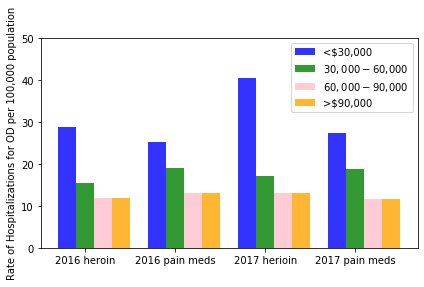

In [92]:
# bar chart for income
n_groups = 4
low = income_final.iloc[0,1:5]
middle = income_final.iloc[1,1:5]
high = income_final.iloc[2,1:5]
highest = income_final.iloc[2,1:5]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index,low,bar_width,alpha=opacity,color='b',label='<$30,000')
rects2 = plt.bar(index+bar_width,middle,bar_width,alpha=opacity,color='g',label='$30,000-$60,000')
rects3 = plt.bar(index + bar_width*2,high,bar_width,alpha=opacity,color='pink',label="$60,000-$90,000")
rects4 = plt.bar(index + bar_width*3,highest,bar_width,alpha=opacity,color='orange',label=">$90,000")


plt.ylabel('Rate of Hospitalizations for OD per 100,000 population')
plt.xticks(index + bar_width, ('2016 heroin', '2016 pain meds', '2017 herioin', '2017 pain meds'))
plt.ylim(0,50)
plt.legend()
plt.tight_layout()
plt.savefig("../Images/income.png")
plt.show()

## Gender

In [19]:
# income in 2016 and 2017
g = df[df["Demographic Sort Key"]=="Female/Male"]
g_16 = g[g["Time Period"]=="CY 2016"]
g_17 = g[g["Time Period"]=="CY 2017"]

g_16["Demographic"].unique()


array(['Female', 'Male'], dtype=object)

In [20]:
# clean 2016
merge1=g_16[g_16["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=g_16[g_16["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


g_merged_16 = pd.merge(merge1,merge2,on="Demographic")


g_merged_16 = g_merged_16.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2016 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

g_merged_16 = g_merged_16.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2016 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
g_merged_16

,Time Period_x,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2016 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2016,Female,8.5,CY 2016,18.1
1,CY 2016,Male,21.2,CY 2016,15.6


In [21]:
# clean 2017

merge1=g_17[g_17["Type of Rate"]=="Rate of hospitalizations for heroin overdose per 100000 population"]
merge1=merge1[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge1=merge1.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for heroin overdose per 100000 population"})

merge2=g_17[g_17["Type of Rate"]=="Rate of hospitalizations for pain medication overdose per 100000 population"]
merge2=merge2[["Time Period","Demographic","Rate of Hospitalizations for Opioid Overdose per 100,000 Residents"]]
merge2=merge2.rename(columns=\
              {"Rate of Hospitalizations for Opioid Overdose per 100,000 Residents":\
               "Rate of hospitalizations for pain medication overdose per 100000 population"})


g_merged_17 = pd.merge(merge1,merge2,on="Demographic")


g_merged_17 = g_merged_17.rename(columns={\
                         "Rate of hospitalizations for heroin overdose per 100000 population":\
                           "2017 Rate of hospitalizations for heroin overdose per 100000 population"
                         })

g_merged_17 = g_merged_17.rename(columns={\
                         "Rate of hospitalizations for pain medication overdose per 100000 population":\
                           "2017 Rate of hospitalizations for pain medication overdose per 100000 population"
                         })
g_merged_17

,Time Period_x,Demographic,2017 Rate of hospitalizations for heroin overdose per 100000 population,Time Period_y,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,CY 2017,Female,9.4,CY 2017,16.1
1,CY 2017,Male,24.1,CY 2017,16.8


In [22]:
gender_final = pd.merge(g_merged_16,g_merged_17,on="Demographic")

gender_final=gender_final.drop(["Time Period_x_x","Time Period_y_x","Time Period_x_y","Time Period_y_y"],axis=1)

gender_final

# Conclusion:
# 1) For herion male def OD a lot more; did not see the difference in pain meds OD

,Demographic,2016 Rate of hospitalizations for heroin overdose per 100000 population,2016 Rate of hospitalizations for pain medication overdose per 100000 population,2017 Rate of hospitalizations for heroin overdose per 100000 population,2017 Rate of hospitalizations for pain medication overdose per 100000 population
0,Female,8.5,18.1,9.4,16.1
1,Male,21.2,15.6,24.1,16.8


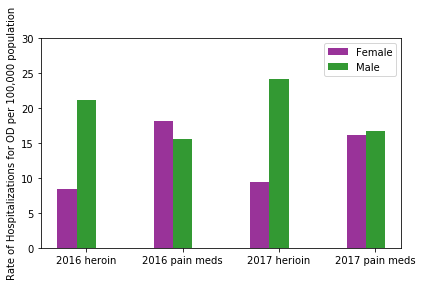

In [99]:
# bar chart for gender
n_groups = 4
f = gender_final.iloc[0,1:5]
m = gender_final.iloc[1,1:5]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8

rects1 = plt.bar(index, f, bar_width, alpha=opacity, color='purple', label='Female')
rects2 = plt.bar(index + bar_width, m, bar_width, alpha=opacity, color='g', label='Male')


plt.ylabel('Rate of Hospitalizations for OD per 100,000 population')
plt.xticks(index + bar_width, ('2016 heroin', '2016 pain meds', '2017 herioin', '2017 pain meds'))
plt.ylim(0,30)
plt.legend()
plt.tight_layout()
plt.savefig("../Images/gender.png")
plt.show()